In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/TFG/textos_procesados.csv'
df_procesado = pd.read_csv(path, usecols=['ODS', 'Texto', 'Tokens'])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
import pickle 
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Variables X e Y para entrenar y probar el algoritmo SVM
# Training = 80%, test = 20%
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_procesado['Tokens'],df_procesado['ODS'],test_size=0.2, shuffle = True, random_state=0)

# TF-IDF
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df_procesado['Tokens'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Counter(Train_Y))
print(Counter(Test_Y))

Counter({3: 1213, 17: 983, 8: 980, 10: 633, 13: 620, 16: 611, 12: 528, 4: 398, 11: 359, 5: 334, 9: 331, 7: 273, 2: 258, 1: 255, 6: 90, 14: 62, 15: 35})
Counter({3: 277, 8: 264, 17: 254, 16: 166, 10: 165, 13: 147, 12: 143, 4: 101, 5: 90, 9: 77, 1: 69, 11: 68, 7: 62, 2: 61, 6: 22, 14: 15, 15: 10})


In [ ]:
# Algoritmo SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, random_state=0, probability=True)
# Entrenamiento del algoritmo 
SVM.fit(Train_X_Tfidf,Train_Y)

Accuracy del modelo ->  54.59568056253139
Porcentaje de acierto para cada una de las clases: 
              precision    recall  f1-score   support

           1       0.37      0.23      0.29        69
           2       0.62      0.70      0.66        61
           3       0.64      0.82      0.72       277
           4       0.66      0.58      0.62       101
           5       0.74      0.84      0.79        90
           6       0.74      0.64      0.68        22
           7       0.48      0.66      0.56        62
           8       0.53      0.54      0.53       264
           9       0.48      0.39      0.43        77
          10       0.54      0.52      0.53       165
          11       0.51      0.29      0.37        68
          12       0.51      0.52      0.52       143
          13       0.54      0.52      0.53       147
          14       0.33      0.20      0.25        15
          15       1.00      0.10      0.18        10
          16       0.49      0.38      0.

<Figure size 432x288 with 0 Axes>

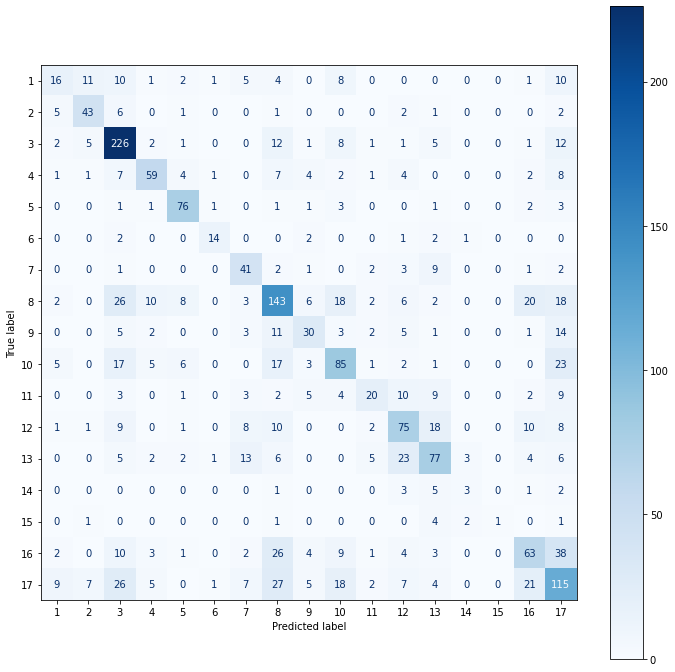

Matriz de confusion train: 


<Figure size 432x288 with 0 Axes>

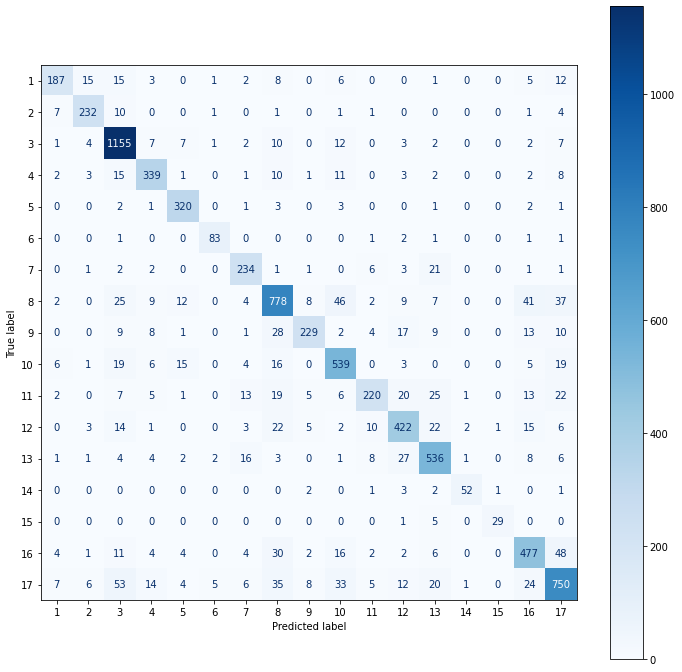

In [ ]:
# Evaluacion del modelo 
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("Accuracy del modelo -> ",accuracy_score(predictions_SVM, Test_Y)*100)

print("Porcentaje de acierto para cada una de las clases: ")
print(classification_report(Test_Y, predictions_SVM))

print("Matriz de confusion test: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(SVM, Test_X_Tfidf, Test_Y, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

print("Matriz de confusion train: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(SVM, Train_X_Tfidf, Train_Y, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

filename = 'final_model.sav'
pickle.dump(SVM, open(filename, 'wb'))

filename2 = 'tfyidf_model.sav'
pickle.dump(Tfidf_vect, open(filename2, 'wb'))

In [ ]:
# Training = 80%, test = 20%, estratificado
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df_procesado['Tokens'],
      df_procesado['ODS'],test_size=0.2, shuffle = True, random_state=0, stratify=df_procesado['ODS'])

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df_procesado['Tokens'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [ ]:
print(Counter(Train_Y))
print(Counter(Test_Y))

Counter({3: 1192, 8: 995, 17: 989, 10: 638, 16: 622, 13: 614, 12: 537, 4: 399, 11: 342, 5: 339, 9: 326, 7: 268, 1: 259, 2: 255, 6: 90, 14: 62, 15: 36})
Counter({3: 298, 8: 249, 17: 248, 10: 160, 16: 155, 13: 153, 12: 134, 4: 100, 11: 85, 5: 85, 9: 82, 7: 67, 1: 65, 2: 64, 6: 22, 14: 15, 15: 9})


In [ ]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=0, probability=True)
SVM.fit(Train_X_Tfidf,Train_Y)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

Accuracy del modelo ->  54.04319437468609
Porcentaje de acierto para cada una de las clases: 
              precision    recall  f1-score   support

           1       0.33      0.25      0.28        65
           2       0.70      0.66      0.68        64
           3       0.66      0.81      0.73       298
           4       0.54      0.56      0.55       100
           5       0.76      0.74      0.75        85
           6       0.70      0.73      0.71        22
           7       0.56      0.48      0.52        67
           8       0.49      0.52      0.50       249
           9       0.55      0.35      0.43        82
          10       0.55      0.60      0.58       160
          11       0.46      0.22      0.30        85
          12       0.43      0.41      0.42       134
          13       0.53      0.63      0.57       153
          14       0.73      0.53      0.62        15
          15       0.60      0.33      0.43         9
          16       0.41      0.43      0.

<Figure size 432x288 with 0 Axes>

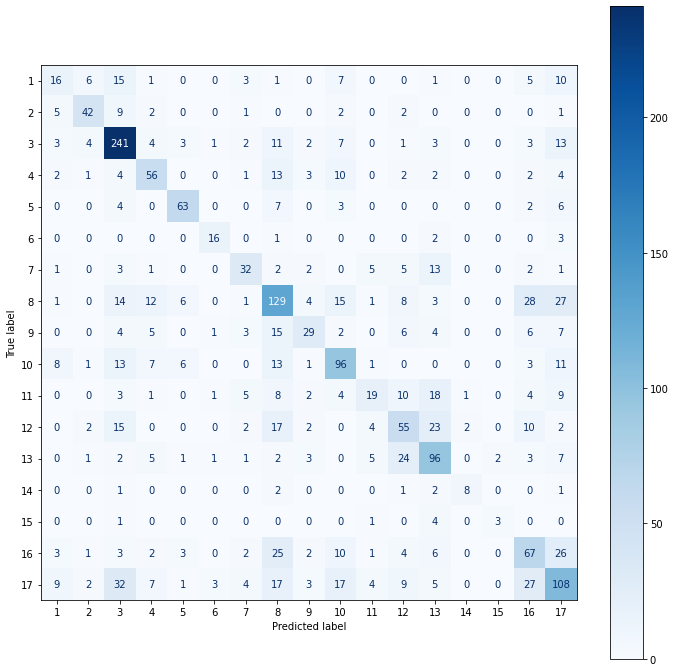

Matriz de confusion train: 


<Figure size 432x288 with 0 Axes>

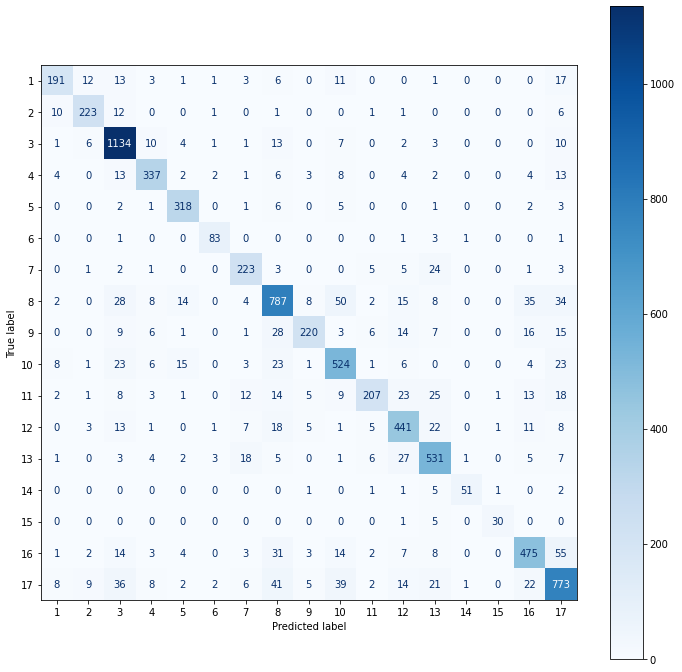

In [ ]:
predictions_SVM = SVM.predict(Test_X_Tfidf)
print("Accuracy del modelo -> ",accuracy_score(predictions_SVM, Test_Y)*100)

print("Porcentaje de acierto para cada una de las clases: ")
print(classification_report(Test_Y, predictions_SVM))

print("Matriz de confusion test: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(SVM, Test_X_Tfidf, Test_Y, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 

print("Matriz de confusion train: ")
plt.clf()
fig,ax = plt.subplots(figsize=(12,12))
plot_confusion_matrix(SVM, Train_X_Tfidf, Train_Y, cmap=plt.cm.Blues, ax=ax, values_format='d')
plt.show() 


In [ ]:
# Algoritmo SVM utilizando cross-validation
from sklearn.model_selection import cross_val_score

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df_procesado['Tokens'])

X = Tfidf_vect.transform(df_procesado['Tokens'])

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=0)
scores = cross_val_score(SVM, X, df_procesado['ODS'], cv=10)

for index, value in enumerate(scores):
  print(f"Accuracy del fold {index} -> {value:.2%}")

print(f"Accuracy medio: {scores.mean():.2%}, desviación estandar: {scores.std():.2%}")

Accuracy del fold 0 -> 56.93%
Accuracy del fold 1 -> 58.63%
Accuracy del fold 2 -> 49.10%
Accuracy del fold 3 -> 56.43%
Accuracy del fold 4 -> 53.37%
Accuracy del fold 5 -> 51.86%
Accuracy del fold 6 -> 53.97%
Accuracy del fold 7 -> 54.27%
Accuracy del fold 8 -> 48.34%
Accuracy del fold 9 -> 44.82%
 Accuracy medio: 52.77%, desviación estandar: 4.08%


In [ ]:
# Variables X e Y para entrenar y probar el algoritmo SVM
# Training = 100%
Train_X = df_procesado['Tokens']
Train_Y = df_procesado['ODS']

# TF-IDF
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df_procesado['Tokens'])

Train_X_Tfidf = Tfidf_vect.transform(Train_X)

In [ ]:
# Algoritmo SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, random_state=0, probability=True)
# Entrenamiento del algoritmo 
SVM.fit(Train_X_Tfidf,Train_Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
filename = 'modelo_datos.sav'
pickle.dump(SVM, open(filename, 'wb'))


In [ ]:
filename2 = 'tf-idf_model.sav'
pickle.dump(Tfidf_vect, open(filename2, 'wb'))